In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
train=pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')

In [5]:
test.isna().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [6]:
train['rainfall'].value_counts()

rainfall
1    1650
0     540
Name: count, dtype: int64

In [7]:
train.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [8]:
train['day'].describe()

count    2190.000000
mean      179.948402
std       105.203592
min         1.000000
25%        89.000000
50%       178.500000
75%       270.000000
max       365.000000
Name: day, dtype: float64

In [9]:
test.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [10]:
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [11]:
train['year']=train['id']//365 + 1
train.groupby(train['year'])['day'].describe()

test['year']=test['id']//365 + 1
test.groupby(test['year'])['day'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
7,365.0,183.0,105.510663,1.0,92.0,183.0,274.0,365.0
8,365.0,183.0,105.510663,1.0,92.0,183.0,274.0,365.0


In [12]:
train[train.year==4][['id','day']]

,id,day
1095,1095,1
1096,1096,2
1097,1097,3
1098,1098,4
1099,1099,5
...,...,...
1455,1455,361
1456,1456,362
1457,1457,144
1458,1458,17


In [13]:
## Checking for missing values

missing_proportions = {}
for col in train.columns:
    missing_proportions[col] = train[col].isnull().sum()

print(missing_proportions)

{'id': 0, 'day': 0, 'pressure': 0, 'maxtemp': 0, 'temparature': 0, 'mintemp': 0, 'dewpoint': 0, 'humidity': 0, 'cloud': 0, 'sunshine': 0, 'winddirection': 0, 'windspeed': 0, 'rainfall': 0, 'year': 0}


In [14]:
train['day'].value_counts()

day
91     7
144    7
267    7
140    7
111    7
      ..
157    5
286    5
38     5
336    5
365    5
Name: count, Length: 365, dtype: int64

### EDA And Visualization

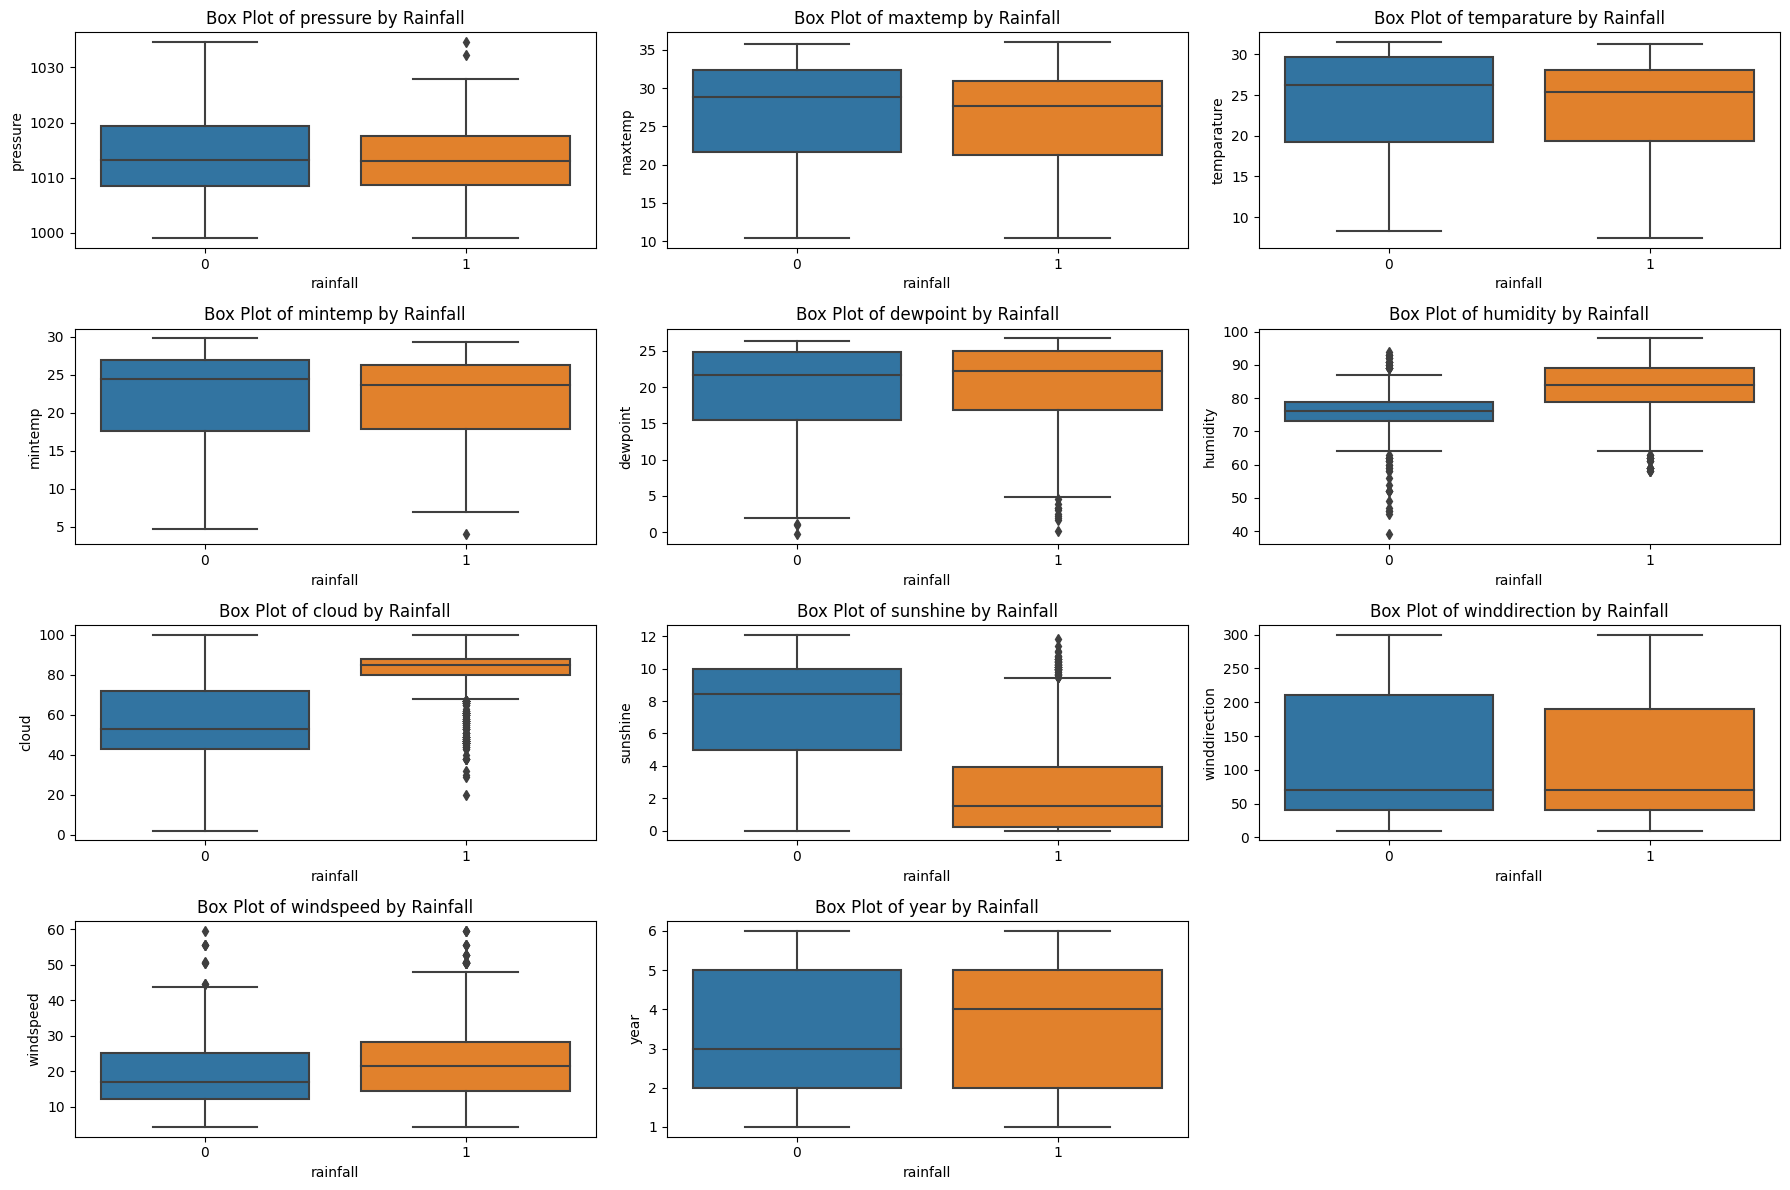

In [15]:
continuous_vars = list(train.drop(columns=['id','day','rainfall']).columns)

# Create subplots
num_cols = 3
num_rows = -(-len(continuous_vars) // num_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))  
axes = axes.flatten()

for i, var in enumerate(continuous_vars):
    sns.boxplot(x='rainfall', y=var, data=train, ax=axes[i])
    axes[i].set_title(f"Box Plot of {var} by Rainfall")



for j in range(len(continuous_vars), len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

In [16]:
# import matplotlib.pyplot as plt

# # Ensure 'year' column exists
# train['year'] = train['id'] // 365 + 1

# # Get unique years
# years = train['year'].unique()

# # Set up subplots
# fig, axes = plt.subplots(len(years), 1, figsize=(12, 4 * len(years)), sharex=True, sharey=True)

# # If only one year, convert axes to a list
# if len(years) == 1:
#     axes = [axes]

# # Plot each year separately
# for i, year in enumerate(years):
#     subset = train[train['year'] == year]
#     axes[i].plot(subset['day'], subset['rainfall'], linestyle='-', marker='o', markersize=2, color='blue', alpha=0.7)
#     axes[i].set_title(f'Binary Rainfall Time Series - Year {year}')
#     axes[i].set_ylabel('Rain (1=Yes, 0=No)')

# # Common X-label
# plt.xlabel('Day of Year')
# plt.tight_layout()
# plt.show()


In [17]:
## Checking missing proportions
train.isnull().mean()

id               0.0
day              0.0
pressure         0.0
maxtemp          0.0
temparature      0.0
mintemp          0.0
dewpoint         0.0
humidity         0.0
cloud            0.0
sunshine         0.0
winddirection    0.0
windspeed        0.0
rainfall         0.0
year             0.0
dtype: float64

In [18]:
train['rainfall'].value_counts(normalize=True)

## Slighly imbalanced

rainfall
1    0.753425
0    0.246575
Name: proportion, dtype: float64

## Feature Engineering


In [19]:
test['id'].describe()

count     730.000000
mean     2554.500000
std       210.877136
min      2190.000000
25%      2372.250000
50%      2554.500000
75%      2736.750000
max      2919.000000
Name: id, dtype: float64

In [20]:
def feature_engineering(df, dataset_type):
    df=df.sort_values(by=['id'])
    df['temp_diff'] = df['maxtemp'] - df['mintemp']
    df['avg_temp'] = (df['maxtemp'] + df['mintemp']) / 2

    for i in df.columns:
        df[f'{i}'] = df[i].fillna(method='ffill')

    if dataset_type == 'train':
        for i in df.drop(columns=['id', 'day', 'rainfall']).columns:
            df[f'{i}_m_avg']=df[i].rolling(window=5).mean().fillna(df[i].mean())
            df[f'{i}_sqr'] = df[i] ** 2
            df[f'{i}_lagged']=df[i].shift(1).fillna(df[i].mean())

    elif dataset_type == 'test':
        for i in df.drop(columns=['id', 'day']).columns:
            df[f'{i}_m_avg']=df[i].rolling(window=5).mean().fillna(df[i].mean())
            df[f'{i}_sqr'] = df[i] ** 2
            df[f'{i}_lagged']=df[i].shift(1).fillna(df[i].mean())


    return df

In [21]:
train_final=feature_engineering(train,'train')


<ipython-input-20-a98eba8bf782>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'{i}'] = df[i].fillna(method='ffill')


In [22]:
train_final.isna().mean()

id                      0.0
day                     0.0
pressure                0.0
maxtemp                 0.0
temparature             0.0
mintemp                 0.0
dewpoint                0.0
humidity                0.0
cloud                   0.0
sunshine                0.0
winddirection           0.0
windspeed               0.0
rainfall                0.0
year                    0.0
temp_diff               0.0
avg_temp                0.0
pressure_m_avg          0.0
pressure_sqr            0.0
pressure_lagged         0.0
maxtemp_m_avg           0.0
maxtemp_sqr             0.0
maxtemp_lagged          0.0
temparature_m_avg       0.0
temparature_sqr         0.0
temparature_lagged      0.0
mintemp_m_avg           0.0
mintemp_sqr             0.0
mintemp_lagged          0.0
dewpoint_m_avg          0.0
dewpoint_sqr            0.0
dewpoint_lagged         0.0
humidity_m_avg          0.0
humidity_sqr            0.0
humidity_lagged         0.0
cloud_m_avg             0.0
cloud_sqr           

In [23]:
train_final['winddirection'].head()

0    60.0
1    50.0
2    70.0
3    60.0
4    40.0
Name: winddirection, dtype: float64

In [24]:
test_final=feature_engineering(test,'test')

<ipython-input-20-a98eba8bf782>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'{i}'] = df[i].fillna(method='ffill')


In [25]:
test_final.isna().mean()

id                      0.0
day                     0.0
pressure                0.0
maxtemp                 0.0
temparature             0.0
mintemp                 0.0
dewpoint                0.0
humidity                0.0
cloud                   0.0
sunshine                0.0
winddirection           0.0
windspeed               0.0
year                    0.0
temp_diff               0.0
avg_temp                0.0
pressure_m_avg          0.0
pressure_sqr            0.0
pressure_lagged         0.0
maxtemp_m_avg           0.0
maxtemp_sqr             0.0
maxtemp_lagged          0.0
temparature_m_avg       0.0
temparature_sqr         0.0
temparature_lagged      0.0
mintemp_m_avg           0.0
mintemp_sqr             0.0
mintemp_lagged          0.0
dewpoint_m_avg          0.0
dewpoint_sqr            0.0
dewpoint_lagged         0.0
humidity_m_avg          0.0
humidity_sqr            0.0
humidity_lagged         0.0
cloud_m_avg             0.0
cloud_sqr               0.0
cloud_lagged        

## Basic Model Fitting


In [26]:
from sklearn.model_selection import train_test_split

X=train_final.drop(columns=['id','day','rainfall'])
y=train_final['rainfall']

In [27]:
train_final['rainfall'].value_counts()

rainfall
1    1650
0     540
Name: count, dtype: int64

In [28]:


X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=y,test_size=0.2, random_state=42)
# X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [29]:
y_train.shape

(1752,)

In [30]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=42,k_neighbors=5)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [31]:
y_train.value_counts()
# y_train_resampled.value_counts()

rainfall
1    1320
0     432
Name: count, dtype: int64

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [34]:
clf = DecisionTreeClassifier(max_depth=5,random_state=42,min_samples_leaf=round(len(X_train)/100))
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=18, random_state=42)

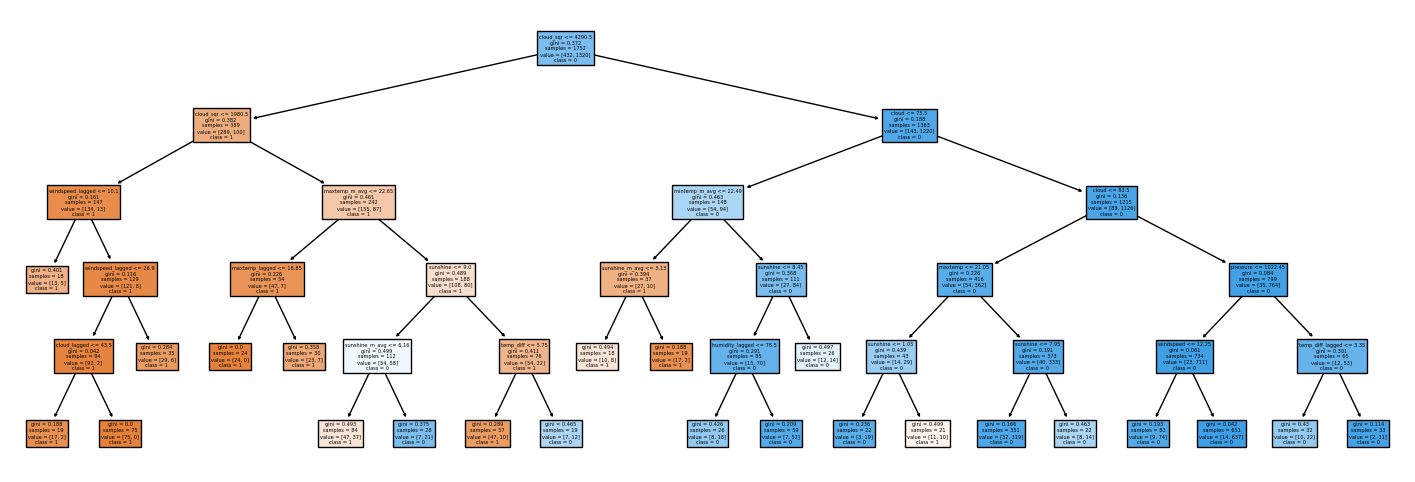

In [35]:
plt.figure(figsize=(18, 6))
class_names = [str(cls) for cls in y_train.unique()] 
plot_tree(clf, feature_names=X_train.columns, class_names=class_names, filled=True)

plt.savefig("decision_tree_rainfall_smote.png", dpi=500, bbox_inches='tight')
plt.show()


In [36]:
y_pred = clf.predict(X_test)


In [37]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8562
Precision: 0.8870
Recall: 0.9273
F1-score: 0.9067

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69       108
           1       0.89      0.93      0.91       330

    accuracy                           0.86       438
   macro avg       0.81      0.78      0.80       438
weighted avg       0.85      0.86      0.85       438



In [38]:
from sklearn.metrics import precision_recall_curve

y_probs = clf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Select threshold where precision and recall are balanced
optimal_idx = (precision + recall).argmax()
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)
# Make new predictions
y_pred_new = (y_probs > optimal_threshold).astype(int)

0.47619047619047616


In [39]:
from sklearn.ensemble import RandomForestClassifier

## Random Search Optimization of Hyperparameters


In [40]:
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the pipeline (SMOTE + RandomForest)
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

# Define parameter distributions correctly
param_distributions = {
    'smote__sampling_strategy': [0.5, 0.7, 'auto'],
    'model__n_estimators': [200, 400, 600, 800],
    'model__max_depth': [5, 10, 15],
    'model__min_samples_leaf': [5, 10, 15, 30],
    'model__max_features': ['sqrt', 'log2']
}


opt = RandomizedSearchCV(pipeline, param_distributions, n_iter=20, cv=5, scoring='f1', n_jobs=-1, random_state=42)
opt.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", opt.best_params_)


Best Parameters: {'smote__sampling_strategy': 0.5, 'model__n_estimators': 400, 'model__min_samples_leaf': 5, 'model__max_features': 'sqrt', 'model__max_depth': 15}


## Bayesian Optimization of Hyperparameters


In [41]:
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])


param_space = {
    'smote__sampling_strategy': Categorical([0.5, 0.7, 'auto']),  
    'model__n_estimators': Integer(200, 800),
    'model__max_depth': Integer(5, 15),
    'model__min_samples_leaf': Integer(5, 30),
    'model__max_features': Categorical(['sqrt', 'log2'])
}

# Perform Bayesian Optimization with Cross-Validation
opt = BayesSearchCV(pipeline, param_space, n_iter=20, cv=5, scoring='f1', n_jobs=-1, random_state=42)
opt.fit(X_train, y_train)





AttributeError: 'BayesSearchCV' object has no attribute 'best_bayes_params_'

In [42]:
# Corrected best parameters output
print("Best Parameters:", opt.best_params_)

Best Parameters: OrderedDict([('model__max_depth', 15), ('model__max_features', 'sqrt'), ('model__min_samples_leaf', 5), ('model__n_estimators', 300), ('smote__sampling_strategy', 0.5)])


In [43]:
best_params = opt.best_params_
best_smote_strategy = best_params['smote__sampling_strategy']

# Apply SMOTE separately
smote = SMOTE(sampling_strategy=best_smote_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Extract only RandomForest parameters
rf_params = {k.replace('model__', ''): v for k, v in best_params.items() if k.startswith('model__')}

# Train RandomForest with the best parameters
clf_rf = RandomForestClassifier(**rf_params, random_state=42)
clf_rf.fit(X_resampled, y_resampled)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=300,
                       random_state=42)

In [45]:
best_params = opt.best_bayes_params_
best_smote_strategy = best_params['smote__sampling_strategy']

# Apply SMOTE separately
smote = SMOTE(sampling_strategy=best_smote_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Extract only RandomForest parameters
rf_params = {k.replace('model__', ''): v for k, v in best_params.items() if k.startswith('model__')}

# Train RandomForest with the best parameters
clf_rf = RandomForestClassifier(**rf_params, random_state=42)
clf_rf.fit(X_resampled, y_resampled)

In [46]:
y_pred = clf_rf.predict(X_test)


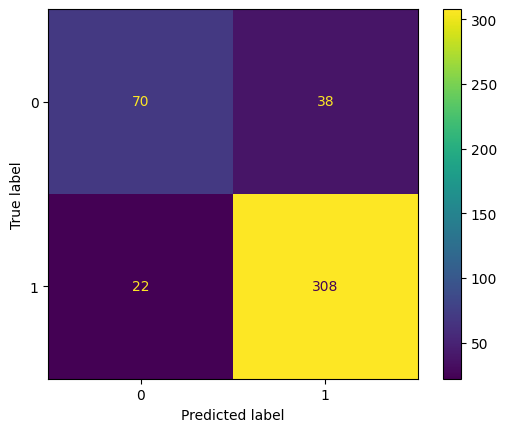

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_rf.classes_)
disp.plot()

plt.show()

In [48]:
# pip install scikit-plot

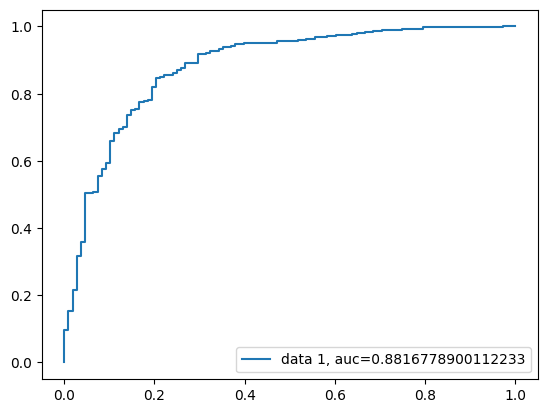

In [49]:
from sklearn import metrics

y_pred_proba = clf_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [50]:
from sklearn.metrics import precision_recall_curve

y_probs = clf_rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

import statistics
# Select threshold where precision and recall are balanced
optimal_idx = ((2*precision*recall)/(precision+recall)).argmax()
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)
# Make new predictions
y_pred_new = (y_probs > optimal_threshold).astype(int)

0.4341052942155881


In [51]:
optimal_threshold 

0.4341052942155881

In [52]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8630
Precision: 0.8902
Recall: 0.9333
F1-score: 0.9112

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.65      0.70       108
           1       0.89      0.93      0.91       330

    accuracy                           0.86       438
   macro avg       0.83      0.79      0.81       438
weighted avg       0.86      0.86      0.86       438



In [53]:
y_pred_submit = clf_rf.predict_proba(test_final.drop(columns=["id","day"]))[:, 1]
submission = pd.DataFrame({
    "id": test["id"],  # Include ID column
    "rainfall": y_pred_submit  # Change to y_proba_kaggle if required
})

In [54]:
submission.to_csv('submission_ver4_smote.csv',index=False)

In [55]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': clf_rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Print feature importance
print(feature_importance)

                 Feature  Importance
6                  cloud    0.175989
32             cloud_sqr    0.157894
35          sunshine_sqr    0.099334
7               sunshine    0.080355
5               humidity    0.053010
29          humidity_sqr    0.045315
31           cloud_m_avg    0.029105
34        sunshine_m_avg    0.018569
28        humidity_m_avg    0.013647
4               dewpoint    0.011854
26          dewpoint_sqr    0.011828
9              windspeed    0.010948
0               pressure    0.010452
47         temp_diff_sqr    0.010288
14          pressure_sqr    0.010167
11             temp_diff    0.009961
41         windspeed_sqr    0.009838
13        pressure_m_avg    0.009519
33          cloud_lagged    0.009459
1                maxtemp    0.008912
40       windspeed_m_avg    0.008617
25        dewpoint_m_avg    0.008536
46       temp_diff_m_avg    0.008443
48      temp_diff_lagged    0.008136
42      windspeed_lagged    0.008016
36       sunshine_lagged    0.007927
1

In [68]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=1000,  
    learning_rate=0.01,  
    max_depth=4,  
    subsample=0.8,  # Row sampling
    colsample_bytree=0.8,  # Feature sampling
    random_state=42,
    min_samples_leaf=round(len(X_train)/100)
)

# Fit the model
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:09:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, min_samples_leaf=18, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [69]:
y_pred = xgb_model.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8699
Precision: 0.8845
Recall: 0.9515
F1-score: 0.9168

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.62      0.70       108
           1       0.88      0.95      0.92       330

    accuracy                           0.87       438
   macro avg       0.85      0.79      0.81       438
weighted avg       0.87      0.87      0.86       438



In [56]:
import xgboost as xgb
import numpy as np
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [57]:
search_space = {
    "n_estimators": Integer(100, 1000),
    "learning_rate": Real(0.02, 0.3, prior="log-uniform"),
    "max_depth": Integer(3, 15),
    "subsample": Real(0.6, 1.0),
    "colsample_bytree": Real(0.6, 1.0),
    "gamma": Real(0, 0.5),
    "reg_lambda": Real(0.1, 10, prior="log-uniform"),
    "reg_alpha": Real(0.1, 10, prior="log-uniform")
}

In [59]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))
])

# Define the Bayesian search space
search_space = {
    'smote__sampling_strategy': Categorical([0.5, 0.7, 'auto']),  # SMOTE parameter
    'model__n_estimators': Integer(100, 500),
    'model__max_depth': Integer(3, 15),
    'model__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'model__subsample': Real(0.5, 1.0),
    'model__colsample_bytree': Real(0.5, 1.0),
    'model__gamma': Real(0, 5),
    'model__min_child_weight': Integer(1, 10)
}

# Bayesian optimization using BayesSearchCV
bayes_search = BayesSearchCV(
    pipeline,
    search_spaces=search_space,
    n_iter=50,  # Number of parameter sets to evaluate
    cv=5,
    scoring="f1",
    n_jobs=-1,
    random_state=42
)

# Fit search to data
bayes_search.fit(X_train_res, y_train)

# Best parameters
print("Best Parameters:", bayes_search.best_params_)


Best Parameters: OrderedDict([('model__colsample_bytree', 0.5), ('model__gamma', 0.0), ('model__learning_rate', 0.01), ('model__max_depth', 3), ('model__min_child_weight', 1), ('model__n_estimators', 500), ('model__subsample', 0.5), ('smote__sampling_strategy', 0.5)])


In [62]:
best_params = bayes_search.best_params_
print("Best Parameters:", best_params)

best_sampling_strategy = best_params['smote__sampling_strategy']
smote = SMOTE(sampling_strategy=best_sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# **Step 2: Train final XGBoost model with best parameters**
best_xgb = xgb.XGBClassifier(
    n_estimators=best_params['model__n_estimators'],
    max_depth=best_params['model__max_depth'],
    learning_rate=best_params['model__learning_rate'],
    subsample=best_params['model__subsample'],
    colsample_bytree=best_params['model__colsample_bytree'],
    gamma=best_params['model__gamma'],
    min_child_weight=best_params['model__min_child_weight'],
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# Train final model
best_xgb.fit(X_resampled, y_resampled)


Best Parameters: OrderedDict([('model__colsample_bytree', 0.5), ('model__gamma', 0.0), ('model__learning_rate', 0.01), ('model__max_depth', 3), ('model__min_child_weight', 1), ('model__n_estimators', 500), ('model__subsample', 0.5), ('smote__sampling_strategy', 0.5)])


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [73]:
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))
])
best_sampling_strategy = best_params['smote__sampling_strategy']
smote = SMOTE(sampling_strategy=best_sampling_strategy, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# Define the Bayesian search space
search_space = {
    
    'model__n_estimators': Integer(100, 500),
    'model__max_depth': Integer(3, 15),
    'model__learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'model__subsample': Real(0.5, 1.0),
    'model__colsample_bytree': Real(0.5, 1.0),
    'model__gamma': Real(0, 5),
    'model__min_child_weight': Integer(1, 10)
}

# Bayesian optimization using BayesSearchCV
bayes_search = BayesSearchCV(
    pipeline,
    search_spaces=search_space,
    n_iter=50,  # Number of parameter sets to evaluate
    cv=5,
    scoring="f1",
    n_jobs=-1,
    random_state=42
)

# Fit search to data
bayes_search.fit(X_resampled, y_resampled)

# Best parameters
print("Best Parameters:", bayes_search.best_params_)


Best Parameters: OrderedDict([('model__colsample_bytree', 0.5), ('model__gamma', 0.0), ('model__learning_rate', 0.010551658415632681), ('model__max_depth', 14), ('model__min_child_weight', 1), ('model__n_estimators', 476), ('model__subsample', 0.756564695537104)])


In [74]:
best_params = bayes_search.best_params_
print("Best Parameters:", best_params)


# **Step 2: Train final XGBoost model with best parameters**
best_xgb = xgb.XGBClassifier(
    n_estimators=best_params['model__n_estimators'],
    max_depth=best_params['model__max_depth'],
    learning_rate=best_params['model__learning_rate'],
    subsample=best_params['model__subsample'],
    colsample_bytree=best_params['model__colsample_bytree'],
    gamma=best_params['model__gamma'],
    min_child_weight=best_params['model__min_child_weight'],
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)

# Train final model
best_xgb.fit(X_resampled, y_resampled)

Best Parameters: OrderedDict([('model__colsample_bytree', 0.5), ('model__gamma', 0.0), ('model__learning_rate', 0.010551658415632681), ('model__max_depth', 14), ('model__min_child_weight', 1), ('model__n_estimators', 476), ('model__subsample', 0.756564695537104)])


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.010551658415632681, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=476, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [75]:
y_pred = best_xgb.predict(X_test)

In [76]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8653
Precision: 0.8905
Recall: 0.9364
F1-score: 0.9129

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.65      0.70       108
           1       0.89      0.94      0.91       330

    accuracy                           0.87       438
   macro avg       0.83      0.79      0.81       438
weighted avg       0.86      0.87      0.86       438



In [77]:
y_pred_submit = best_xgb.predict_proba(test_final.drop(columns=["id","day"]))[:, 1]

In [78]:
submission = pd.DataFrame({
    "id": test["id"],  # Include ID column
    "rainfall": y_pred_submit  # Change to y_proba_kaggle if required
})

In [79]:
submission.to_csv('submission_ver5_xgb_smote_final.csv',index=False)

In [3]:
import lightgbm as lgb

In [4]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

NameError: name 'X_train' is not defined

In [ ]:
num_bins = 10  

binned_means = {}

for i, var in enumerate(X_test.columns):
    df_test[f'{var}_bin'] = pd.qcut(df_test[var], q=num_bins, duplicates='drop')
    mean_values = df_test.groupby(f'{var}_bin')[['rainfall', 'y_pred']].mean().reset_index()
    
    # Store in dictionary
    binned_means[var] = mean_values

dfs = []
for var, means in binned_means.items():
    means = means.copy()  # Avoid modifying original data
    means['Variable'] = var  # Add a column to identify the variable
    means.rename(columns={means.columns[0]: 'Range', means.columns[1]: 'Mean_Target', means.columns[2]: 'Mean_Predicted'}, inplace=True)
    dfs.append(means)

# Combine all into one DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

# Save to CSV
combined_df.to_csv('binned_means_all.csv', index=False)


In [ ]:
clf = lgb.LGBMClassifier(n_estimators=500,random_state=42,subsample=1.0,max_depth=10,learning_rate=0.05)
clf.fit(X_train, y_train)

In [ ]:
y_pred=clf.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
y_pred_submit_lightgbm = clf.predict_proba(test.drop(columns=["id","day"]))[:, 1]

In [ ]:
submission = pd.DataFrame({
    "id": test["id"],  # Include ID column
    "rainfall": y_pred_submit_lightgbm  # Change to y_proba_kaggle if required
})

In [ ]:
submission.to_csv('version2_lightgbm.csv',index=False)